In [197]:
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.utils import resample

In [198]:
iris=load_iris()
X=iris.data[:,:2]
Y=iris.target

setosa_train=X[:25,:]
versicolor_train=X[50:75,:]
virginica_train=X[100:125,:]

X_train=np.append(setosa_train,versicolor_train,axis=0)
X_train=np.append(X_train,virginica_train,axis=0)

setosa_test=X[25:50,:]
versicolor_test=X[75:100,:]
virginica_test=X[125:150,:]

X_test=np.append(setosa_test,versicolor_test,axis=0)
X_test=np.append(X_test,virginica_test,axis=0)

Y_train=Y[:25]
Y_train=np.append(Y_train,Y[50:75])
Y_train=np.append(Y_train,Y[100:125])

Y_test=Y_train

In [232]:
max=0
depth=5
for i in range (0,100):
    X_train_Y=np.column_stack((X_train,Y_train))
    X_resample= resample(X_train_Y,n_samples=int(X_train_Y.shape[0]*4/5))
    X_train_resample= resample(X_resample,n_samples=100)
    Y_train_resample=X_train_resample[:,2]
    X_train_resample=X_train_resample[:,:2]
    clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
    clf = clf.fit(X_train_resample,Y_train_resample)
    if (i==1):
        best_clf=clf
    Y_pred = clf.predict(X_test)
    #print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    if (metrics.accuracy_score(Y_test, Y_pred)>max):
        max=metrics.accuracy_score(Y_test, Y_pred)
        best_clf=clf

print(max)



0.8


Accuracy: 0.8


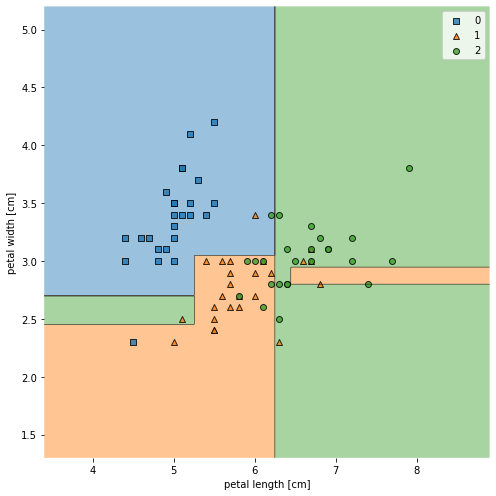

In [233]:
Y_pred = best_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_test,Y_test, best_clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [344]:
max=0
depth=11
stack=np.column_stack((X_train,Y_train))
temp = stack[:12,:]
temp = np.append( temp , stack[25:37,:],axis=0)
temp = np.append( temp , stack[50:62,:],axis=0)

for i in range (0,100):
    X_train_resample=resample( temp ,n_samples=100)
    Y_train_resample=X_train_resample[:,2]
    X_train_resample=X_train_resample[:,:2]
    
    clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
    clf = clf.fit(X_train_resample,Y_train_resample)
    if (i==1):
        best_clf=clf
    Y_pred = clf.predict(X_test)
    #print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    if (metrics.accuracy_score(Y_test, Y_pred)>max):
        max=metrics.accuracy_score(Y_test, Y_pred)
        best_clf=clf

print(max)



0.7866666666666666


Accuracy: 0.8133333333333334


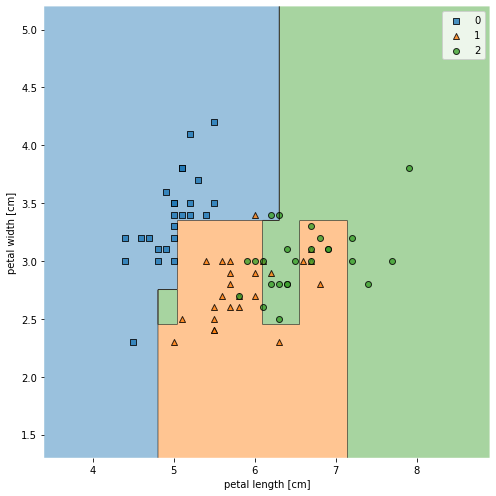

In [324]:
Y_pred = best_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_test,Y_test, best_clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()